# Análise exploratória de dados

In [1]:
from IPython.display import display, Markdown
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

colors = ["#9467bd", "#057476", "#FF7A00"]
# sns.set_style("whitegrid")
sns.set_theme(style="ticks")
sns.set_palette(sns.color_palette(colors))

## 1. Coleta de dados

In [2]:
df = sns.load_dataset('tips')
df.to_csv('../data/raw/data.csv', index=False)
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## 2. Descrição dos dados

`Tips: Tipping data` é um conjunto de dados com informações sobre cada gorjeta que um certo garçom ganhou, durante alguns meses, no restaurante no qual trabalhava.

Os dados foram relatados em uma coleção de estudos de caso para estatísticas empresariais chamada [Practical Data Analysis: Case Studies in Business Statistics](https://www.amazon.com.br/Practical-Data-Analysis-Business-Statistics/dp/0256158282).

O conjunto de dados também está disponível através do pacote [Python Seaborn](https://seaborn.pydata.org).

Tal conjunto de dados pode ser utilizado em tarefas de aprendizado de máquina supervisionado, em tarefas de regressão, sendo `tip`, a variável dependente e o restante utilizado como variáveis preditoras.

### Quantidade de instâncias e se há dados faltantes

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


---
Com isso, além de termos a quantidade de instâncias (`244 instâncias`), temos também que são todas não nulas, mas podemos confirmar com o código abaixo:

In [4]:
# colunas (variáveis) contendo valores valtantes
number_of_na_by_column = df.isnull().sum().loc[lambda x: x > 0]
number_of_na_rows = df.isnull().any(axis=1).sum()

display(number_of_na_by_column)
display(Markdown(
    "---\n"
    f"A partir dessa informação, sabemos que não existem dados faltantes, pois nossa função que busca por esses dados "
    f"retornou uma lista vazia ao invés de conter o nome das variáveis que possuíam ausência de dados."
    f" Além disso, confirmamos que temos `{number_of_na_rows}` linhas com valores faltantes pela segunda função."
    " As análises posteriores serão então realizadas considerando todos os dados do conjunto de dados proposto."
    "\n\n ---"
))

df.dropna(inplace=True)

Series([], dtype: int64)

---
A partir dessa informação, sabemos que não existem dados faltantes, pois nossa função que busca por esses dados retornou uma lista vazia ao invés de conter o nome das variáveis que possuíam ausência de dados. Além disso, confirmamos que temos `0` linhas com valores faltantes pela segunda função. As análises posteriores serão então realizadas considerando todos os dados do conjunto de dados proposto.

 ---

### Dicionário

In [3]:
dicionario = pd.DataFrame([
    {
        "variavel": "total_bill",
        "descricao": "Valor total da conta do cliente, em dólares",
        "tipo":"quantitativa",
        "subtipo":"continua"
    },{
        "variavel": "tip",
        "descricao": "Valor que o cliente deixou de gorjeta, em dólares",
        "tipo":"quantitativa",
        "subtipo":"continua"
    },{
        "variavel": "sex",
        "descricao": "Sexo do cliente que pagou a conta",
        "tipo":"qualitativa",
        "subtipo":"nominal"
    },{
        "variavel": "smoker",
        "descricao": "Indica se alguém na mesa do cliente é fumante ou não",
        "tipo":"qualitativa",
        "subtipo":"nominal"
    },{
        "variavel": "day",
        "descricao": "Dia da semana em que o cliente foi ao restaurante",
        "tipo":"qualitativa",
        "subtipo":"ordinal"
    },{
        "variavel": "time",
        "descricao": "Momento em que o cliente foi ao restaurante. Tem como base o tipo de refeição que ele consumiu",
        "tipo":"qualitativa",
        "subtipo":"ordinal"
    },{
        "variavel": "size",
        "descricao": "Número de pessoas na mesa do cliente",
        "tipo":"quantitativa",
        "subtipo":"discreta"
    }
])
dicionario.to_csv('../data/external/dictionary.csv', index=False)
dicionario


,variavel,descricao,tipo,subtipo
0,total_bill,"Valor total da conta do cliente, em dólares",quantitativa,continua
1,tip,"Valor que o cliente deixou de gorjeta, em dólares",quantitativa,continua
2,sex,Sexo do cliente que pagou a conta,qualitativa,nominal
3,smoker,Indica se alguém na mesa do cliente é fumante ...,qualitativa,nominal
4,day,Dia da semana em que o cliente foi ao restaurante,qualitativa,ordinal
5,time,Momento em que o cliente foi ao restaurante. T...,qualitativa,ordinal
6,size,Número de pessoas na mesa do cliente,quantitativa,discreta


## 3. Perguntas de partida e hipóteses

- Qual a distribuição dos dados (variável por variável)?
- Existe alguma relação entre o dia da semana, o momento em que frequenta e a quantia que o cliente gasta no restaurante?
- Existe alguma relação entre o sexo do cliente, o momento em que frequenta e a quantia que o cliente gasta no restaurante?

### Qual a distribuição dos dados (variável por variável)?

Iniciaremos com as estatísticas descritivas e posteriormente com visualizações das distribuições.

In [5]:
df.describe(include='all')

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


--- 

- O valor total de conta médio entre os clientes (`total_bill`) é de `$19.79`, com um mínimo de `$3.07` e máximo de `$50.81`, aproximadamente.
- O valor médio de gorjeta (`tip`) é de `$3.00`, com um mínimo de `$1.00` e máximo de `$10.00`, aproximadamente.
- O sexo dos clientes pagantes mais frequente é o Masculino (Male).
- A maior parte dos clientes atendidos `não` possuíam fumantes em suas mesas.
- A maior parte dos dados são de clientes que foram aos `Sábados`.
- A maior parte dos dados são de clientes que foram para `Jantar`, possivelmente no horário mais próximo da noite.
- Existem quatro possíveis dias e três possíveis horários.
- O número de pessoas por mesa (`size`) varia entre 1 e 6 pessoas.

---

#### Distribuição das variáveis quantitativas

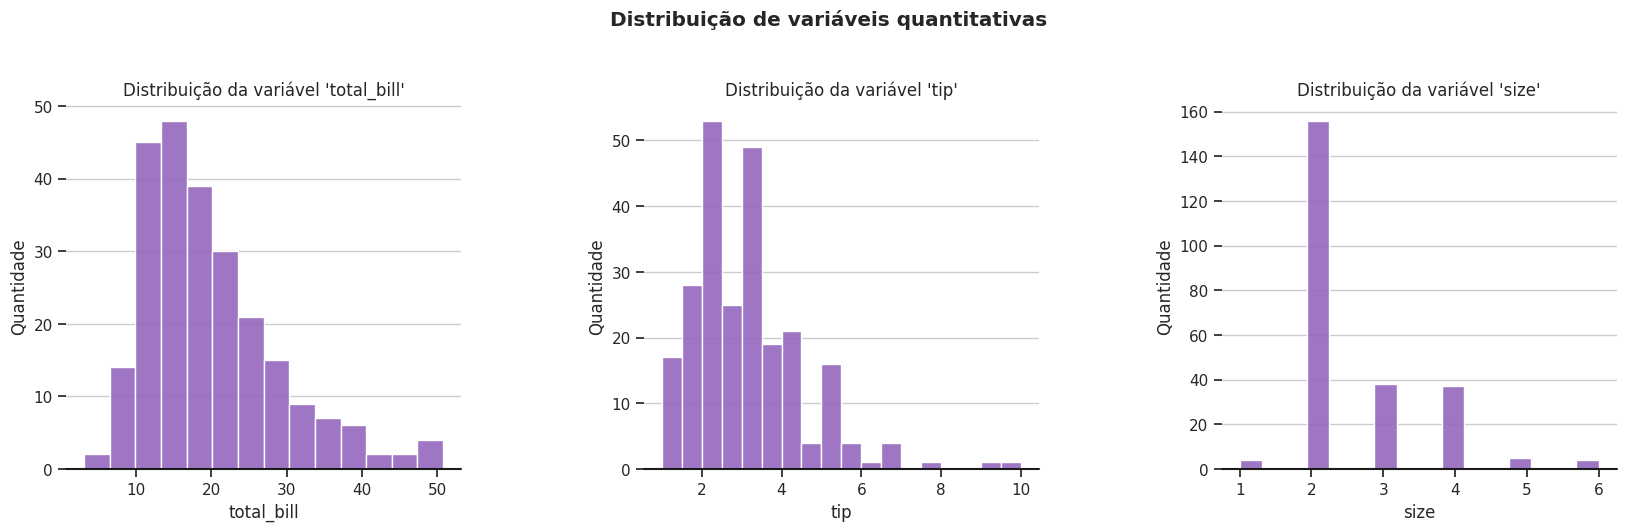

In [74]:
fig, axes = plt.subplots(1, 3, figsize=(18,6))
plt.tight_layout(pad=6, w_pad=8, h_pad=8)
fig.suptitle('Distribuição de variáveis quantitativas', fontweight='bold')
for i, variavel in enumerate(dicionario.query("tipo == 'quantitativa'").variavel.to_list()):
    ax = sns.histplot(
        data=df,
        x=variavel,
        ax=axes.flatten()[i],
        color=colors[0],
        alpha=0.9,
    )
    ax.set(frame_on=False)
    ax.axhline(0, color="k", clip_on=False)
    ax.set_title(f"Distribuição da variável '{variavel}'")
    plt.xlabel(variavel)
    ax.set_ylabel('Quantidade')
    ax.grid(axis='y', linestyle='-')
    # Customize grid to show only vertical lines
plt.show()

--- 
    
- A grande maioria das contas totalizam um valor frequente entre `10` e `20` dólares.
- O valor da gorjeta aparenta possuir uma maioria que fica entre `2` e `4` dólares.
- As contas tendem a não exceder os `30` dólares.
- As gorjetas tendem a ser menores que `4` dólares.
- É notável que a maioria dos clientes foram comer com apenas uma companhia.

---

#### Distribuição das variáveis qualitativas

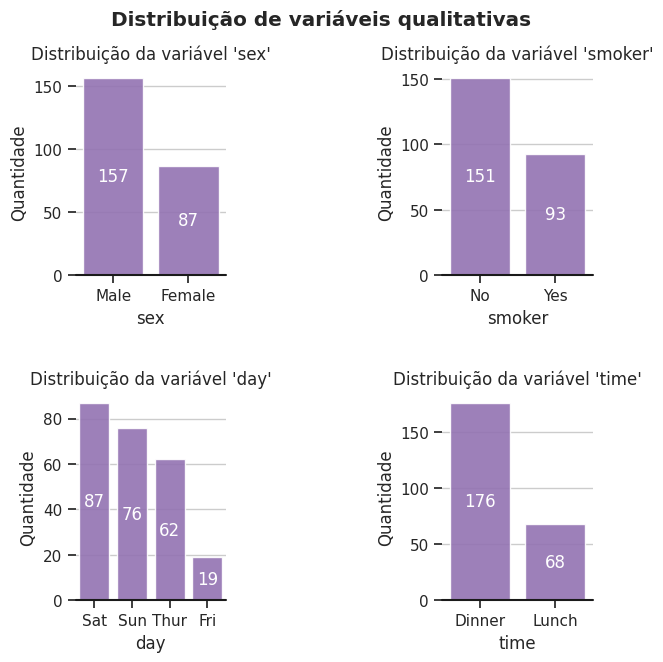

In [63]:
fig, axes = plt.subplots(2, 2, figsize=(7,7))
plt.tight_layout(pad=4, w_pad=10, h_pad=5)
fig.suptitle('Distribuição de variáveis qualitativas', fontweight='bold')
for i, variavel in enumerate(dicionario.query("tipo == 'qualitativa'").variavel.to_list()):
    order = df[variavel].value_counts().index
    ax = sns.countplot(
        data=df,
        x=variavel,
        ax=axes.flatten()[i],
        color=colors[0],
        alpha=0.9,
        order=order
    )
    ax.bar_label(
        ax.containers[0],
        fmt='%.0f',
        label_type='center',
        color='white'
    )
    ax.set(frame_on=False)
    ax.axhline(0, color="k", clip_on=False)
    ax.set_title(f"Distribuição da variável '{variavel}'")
    ax.set_ylabel('Quantidade')
    ax.grid(axis='y', linestyle='-')
plt.show()

--- 
    
- A maioria dos clientes pagantes são do sexo masculino, representando aproximadamente `64%` do total.
- Cerca de `62%` dos grupos não possuem um fumante entre eles.
- O sábado é o dia com a maior frequência de clientes, com aproximadamente `36%` do total, enquanto a sexta-feira tem a menor frequência, com aproximadamente `8%`.
- A maioria dos clientes frequenta o restaurante para jantar, representando cerca de `72%` do total.

---

### Existe alguma relação entre o dia da semana, o momento em que frequenta e a quantia que o cliente gasta no restaurante?

A quantia que o cliente gasta no restaurante é separada por: total da conta (`total_bill`) e gorjeta (`tip`).

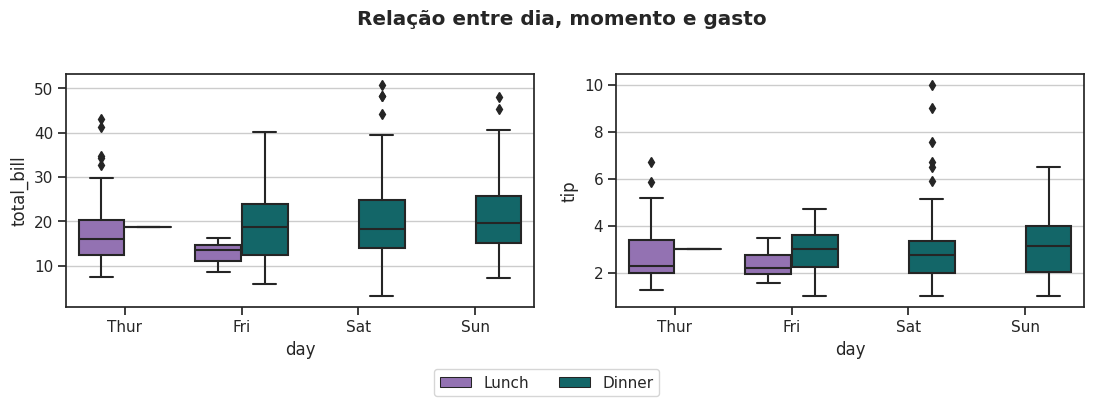

In [81]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))
plt.tight_layout(pad=4, w_pad=2, h_pad=5)
fig.suptitle('Relação entre dia, momento e gasto', fontweight='bold')
for i, variavel in enumerate(dicionario.query("subtipo == 'continua'").variavel.to_list()):
    ax = sns.boxplot(
        x="day", 
        y=variavel, 
        hue="time", 
        data=df, 
        ax=axes.flatten()[i]
    )
    handles, labels = plt.gca().get_legend_handles_labels()
    ax.grid(axis='y', linestyle='-')
    ax.legend([],[], frameon=False)
# sns.despine(offset=2, trim=True)
fig.legend(handles, labels, loc='lower center', ncol=3)
plt.show()

--- 
    
- Durante o horário de almoço, os clientes costumam dar os menores valores de gorjeta.
- Durante as quintas, com apenas uma exceção, só são realizados almoços.
- Nos sábados e domingos só são realizados jantares.
- Quem janta no restaurante, costuma pagar mais do que quem almoça, tanto em valor de conta como em valor de gorjeta.
- O sábado, apesar de ser o dia com jantares com menor número de gorjetas entre 2 e 4 dólares, é o dia com mais outliers, com gorjetas de maior valor.
- Existem mais outliers durante os fins de semana (sábados e domingos), que pagam mais que o normal em gorjetas e contas.

---

### Existe alguma relação entre o sexo do cliente, o momento em que frequenta e a quantia que o cliente gasta no restaurante?

A quantia que o cliente gasta no restaurante é separada por: total da conta (`total_bill`) e gorjeta (`tip`).

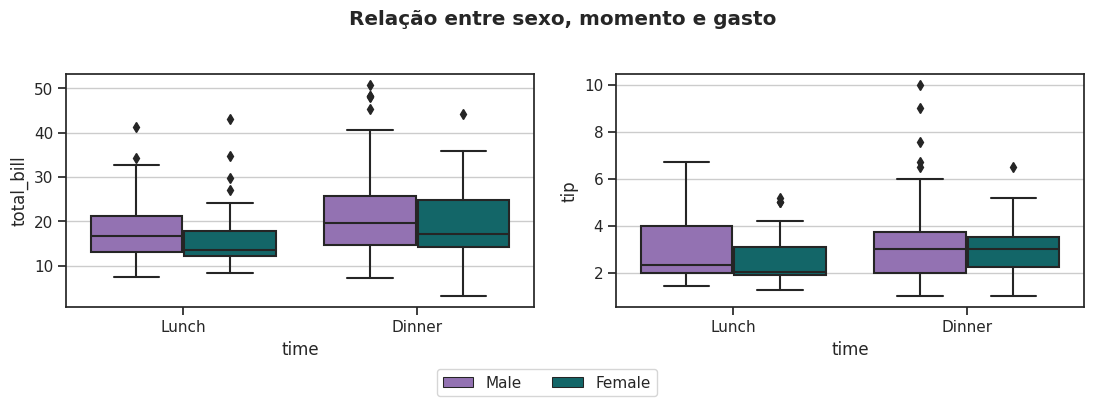

In [84]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))
plt.tight_layout(pad=4, w_pad=2, h_pad=5)
fig.suptitle('Relação entre sexo, momento e gasto', fontweight='bold')
for i, variavel in enumerate(dicionario.query("subtipo == 'continua'").variavel.to_list()):
    ax = sns.boxplot(
        x="time", 
        y=variavel, 
        hue="sex", 
        data=df, 
        ax=axes.flatten()[i]
    )
    handles, labels = plt.gca().get_legend_handles_labels()
    ax.grid(axis='y', linestyle='-')
    ax.legend([],[], frameon=False)
# sns.despine(offset=2, trim=True)
fig.legend(handles, labels, loc='lower center', ncol=3)
plt.show()

--- 
    
- O pagamento de gorjetas mais caras que o padrão (outliers) costuma vir mais de clientes pagantes do sexo masculino.
- O valor das gorjetas durante os almoços costumam ser próximos de `2` dólares, os menores e menos frequentes, visto que existem mais jantares que almoços.
- Os valores das gorjetas durante os jantares não parecem depender tanto do sexo do cliente pagante.
- As gorjetas tendem a possuir uma mediana maior quando o preço total da conta é maior.

---

## 4. Insights

Com a ajuda das visualizações criadas, bem como da análise em relação ao dicionário de dados, as informações mais relevantes que conseguimos adquirir são:

--- 
 
- O valor da gorjeta aparenta possuir uma maioria que fica entre `2` e `4` dólares.
- Durante o horário de almoço, os clientes costumam dar os menores valores de gorjeta.
- Nos sábados e domingos só são realizados jantares.
- Quem janta no restaurante, costuma pagar mais do que quem almoça, tanto em valor de conta como em valor de gorjeta.
- O sábado, apesar de ser o dia com jantares com menor número de gorjetas entre `2` e `4` dólares, é o dia com mais outliers, com gorjetas de maior valor.
- Existem mais outliers durante os fins de semana (sábados e domingos), que pagam mais que o normal em gorjetas e contas.
- Os valores das gorjetas durante os jantares não parecem depender tanto do sexo do cliente pagante.
- As gorjetas tendem a possuir uma mediana maior quando o preço total da conta é maior.
- Como existem padrões entre algumas das variáveis, a combinação de mais delas podem gerar algum modelo capaz de predizer o valor da gorjeta a ser esperado.

---